In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in string.punctuation and token not in stop_words]
    return tokens

In [4]:
from gensim import corpora, models

# Sample titles
titles = [
    "Deep Learning for Image Classification",
    "Quantum Computing Advances and Challenges",
    "Natural Language Processing in Modern Applications",
    "Introduction to Reinforcement Learning",
    "Challenges in Quantum Physics"
]

# Preprocess titles
processed_titles = [preprocess(title) for title in titles]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(processed_titles)
corpus = [dictionary.doc2bow(text) for text in processed_titles]

# Apply LDA model
lda_model = models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

# Print the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.166*"challenge" + 0.166*"quantum" + 0.099*"advance" + 0.099*"computing" + 0.099*"physic"')
(1, '0.125*"learning" + 0.075*"natural" + 0.075*"modern" + 0.075*"language" + 0.075*"processing"')


In [5]:
def get_dominant_topic_from_sentence(sentence, lda_model, dictionary):
    # 1. Preprocess the sentence
    processed_sentence = preprocess(sentence)
    
    # 2. Convert it to bag-of-words representation
    bow_sentence = dictionary.doc2bow(processed_sentence)
    
    # 3. Get the topic distribution
    topic_distribution = lda_model.get_document_topics(bow_sentence)
    
    # 4. Extract the dominant topic
    dominant_topic, _ = max(topic_distribution, key=lambda x: x[1])
    
    # Extract words related to the topic for interpretation
    topic_words = lda_model.show_topic(dominant_topic, topn=5)
    words = ", ".join([word for word, _ in topic_words])
    
    return dominant_topic, words

# Test with a list of sentences
sentences = [
    "Deep Learning algorithms have transformed image analysis.",
    "Quantum mechanics is a fundamental theory in physics.",
    "Natural Language Processing enables computers to understand human languages."
]

for sentence in sentences:
    topic_id, words = get_dominant_topic_from_sentence(sentence, lda_model, dictionary)
    print(f"'{sentence}' is related to topic {topic_id} which includes words: {words}")

'Deep Learning algorithms have transformed image analysis.' is related to topic 1 which includes words: learning, natural, modern, language, processing
'Quantum mechanics is a fundamental theory in physics.' is related to topic 0 which includes words: challenge, quantum, advance, computing, physic
'Natural Language Processing enables computers to understand human languages.' is related to topic 1 which includes words: learning, natural, modern, language, processing


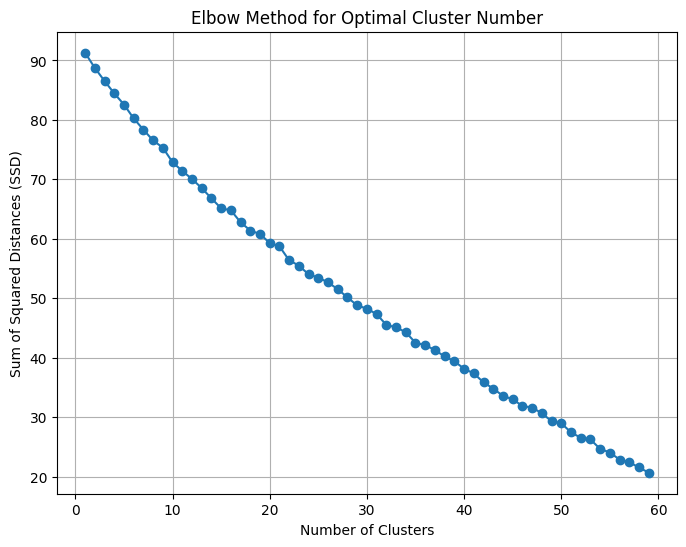

In [20]:
import matplotlib.pyplot as plt


# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(keywords)

# Initialize a list to store the Sum of Squared Distances (SSD) for different cluster numbers
ssd = []

# Define a range of cluster numbers to test
k_range = range(1, 60)  # You can adjust this range based on your data and needs

# Calculate SSD for different cluster numbers
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    ssd.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, ssd, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method for Optimal Cluster Number')
plt.grid()
plt.show()

In [17]:
pip install matplotlib

     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/155.5 kB ? eta -:--:--
     -------------------------------------- 155.5/155.5 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.6 MB 20.3 MB/s eta 0:00:01
   ------------ --------------------------- 2.4/7.6 MB 30.5 MB/s eta 0:00:01
   --------------------- ------------------ 4.1/7.6 MB 32.6 MB/s eta 0:00:01
   --------------------------------- ------ 6.4/7.6 MB 37.1 MB/s eta 0:00:01
   ---------------------------------------  7.6/7.6 MB 37.6 MB/s eta 0:00:01
   ---------------------------------------- 7.6/7.6 MB 32.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/478.0 kB ? eta -:--:--
   --------------------------------------- 478.0/478.0 kB 29.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ------------ ------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

# List of keywords
df = pd.read_csv('keywords_count.csv')
keywords = list(df['keywords'])
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(keywords)

# Apply K-Means clustering
num_clusters = 25  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_matrix)

# Assign each keyword to a cluster
keyword_clusters = kmeans.labels_

# Group keywords based on clusters
keyword_groups = {}
for cluster_id in range(num_clusters):
    group_keywords = [keywords[i] for i, label in enumerate(keyword_clusters) if label == cluster_id]
    keyword_groups[f"Group {cluster_id}"] = group_keywords

# Print the grouped keywords
for group, keywords_in_group in keyword_groups.items():
    print(group, ":")
    for keyword in keywords_in_group:
        print("  -", keyword)

D:\Programmes\Anaconda\envs\dashenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Group 0 :
  - Economics
Group 1 :
  - Computing Hardware and Architecture
  - Computational and Systems Biology
  - Hardware and Embedded Systems
  - Information Sciences and Systems
  - Machines & Systems
  - Distributed Operating Systems
  - Robotics and Intelligent Systems
Group 2 :
  - Cyber Security and Forensics
  - Security
  - Security Studies & Policy Issues
  - Linguistics and Multilingual Studies
Group 3 :
  - Parallel and Distributed Computing
  - Serverless Computing
  - Affective Computing
  - Cloud Computing
Group 4 :
  - Data Mining
  - Data Management
  - Data Science
  - EdTech & Science Communication
  - Biomedical Informatics and Data Science
  - Nanotechnology & Nano-Science
Group 5 :
  - Machine Learning
  - Machine-Person Interoperability
  - Brain Machine Interface
Group 6 :
  - Artificial and Augmented Intelligence
  - Computational Intelligence
  - Artificial Intelligence
  - Artificial Intelligence for Drug Discovery
  - Edge Intelligence
Group 7 :
  - Disrup

In [9]:
pip install scikit-learn

   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.3 MB 1.1 MB/s eta 0:00:09
   -- ------------------------------------- 0.5/9.3 MB 6.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/9.3 MB 11.7 MB/s eta 0:00:01
   ------------- -------------------------- 3.1/9.3 MB 17.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
   --------------------- ------------------ 5.0/9.3 MB 21.2 MB/s eta 0:00:01
   --------------------------- ------------ 6.5/9.3 MB 24.2 MB/s eta 0:00:01
   ----------------------------- ---------- 6.9/9.3 MB 21.1 MB/s eta 0:00:01
   ------------------------------- -------- 7.4/9.3 MB 20.5 MB/s eta 0:00:01
   --------------------------------- ------ 7.8/9.3 MB 19.1 MB/s eta 0:00:01
   ----------------------------------- ---- 8.3/9.3 MB 18.2 MB/s eta 0:00:01
   ------------------------------------- -- 8.7/9.3 MB 17.4 MB/s eta 0:00:01
   -----------------

In [2]:
pip install gensim

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     -------------------------------------- 60.4/60.4 kB 643.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
    --------------------------------------- 0.4/24.0 MB 13.2 MB/s eta 0:00:02
   - -------------------------------------- 0.8/24.0 MB 10.0 MB/s eta 0:00:03
   -- ------------------------------------- 1.3/24.0 MB 10.0 MB/s eta 0:00:03
   -- ------------------------------------- 1.8/24.0 MB 10.4 MB/s eta 0:00:03
   --- ------------------------------------ 2.3/24.0 MB 9.7 MB/s eta 0:00:03
   ---- ----------------------------------- 2.6/24.0 MB 9.9 MB/s eta 0:00:03
   ----- ---------------------------------- 3.2/24.0 MB 10.1 MB/s eta 0:00:03
   ----- ---------------------------------- 3.6/24.0 MB 10.0 MB/s eta 0:00:03
   ------ -

In [4]:
pip install nltk

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
      --------------------------------------- 0.0/1.5 MB 330.3 kB/s eta 0:00:05
     - -------------------------------------- 0.1/1.5 MB 563.7 kB/s eta 0:00:03
     ---------------------------------------  1.5/1.5 MB 10.6 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/269.6 kB ? eta -:--:--
   --------------------------------------- 269.6/269.6 kB 17.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/302.2 kB ? eta -:--:--
   ------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
